<a href="https://colab.research.google.com/github/Valentin-Grachev/Machine-Learning-2023/blob/master/Student_Exam_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [216]:
url = "https://raw.githubusercontent.com/Valentin-Grachev/Machine-Learning-2023/master/dataset.csv"
data = pd.read_csv(url)

# 0. Описание задачи

## Описание датасета
Этот набор данных включает результаты трех тестов более 30 тысяч учащихся (вымышленной) государственной школы и различные личные и социально-экономические факторы, которые могут оказывать на них влияние во время взаимодействия.
## Постановка задачи
Зная социально-экономические данные студента, наиболее точно предсказать его `оценку за экзамен по математике`. При этом `нельзя пользоваться известными результатами экзамена по чтению и письму`.<br>
Это задача восстановления регрессии.

Сразу избавимся от ненужной информации:

In [217]:
data.drop(data.columns[[0]], axis = 1, inplace = True) # Удаление столбца с индексами
data.drop('WritingScore', axis= 1 , inplace= True )
data.drop('ReadingScore', axis= 1 , inplace= True )

# 1. Чтение данных

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 2.8+ MB


In [219]:
data.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87


## Значение признаков

*   `Gender` - пол студента (`male`, `female`)
*   `EthnicGroup` - Этническая группа студента (`group A`, `group B`, `group C`, `group D`, `group E`)
*   `ParentEduc` - Образование родителей (`some high school`, `some college`, `master's degree`, `high school`, `bachelor's degree`, `associate's degree`)
*   `LunchType` - тип школьного обеда (`standard`, `free/reduced`)
*   `TestPrep` - был ли пройден курс подготовки к тестированию (`none`, `completed`)
*   `ParentMaritalStatus` - Семейное положение родителя/родителей (`married`, `widowed`, `single`, `divorced`)
*   `PracticeSport` - как часто студент занимается спортом (`never`, `sometimes`, `regularly`)
*   `IsFirstChild` - является ли ребенок первым ребенком в семье или нет (`yes`, `no`)
*   `NrSiblings` - количество братьев и сестер у студента (`от 0 до 7`)
*   `TransportMeans` - Средства передвижения до школы (`school_bus`, `private`)
*   `WklyStudyHours` - еженедельные часы самостоятельной работы (`< 5`, `5 - 10`, `> 10`)
*   `MathScore` - тестовый балл по математике (`от 0 до 100`)
*   `ReadingScore` - тестовый балл по чтению (`от 0 до 100`)
*   `WritingScore` - оценка за письменный тест (`от 0 до 100`)

Все признаки являются категориальными, за исключением `NrSiblings` и `MathScore`, `ReadingScore`, `WritingScore` - они количественные.
Требуется предсказать количественный признак `MathScore` по остальным признакам, без использования признаков `ReadingScore`, `WritingScore`. Это задача восстановления регрессии.




















# 2. Визуализация данных и вычисление основных характеристик

Составим график количества учащихся, сдавших экзамен на конкретную оценку:

<Axes: xlabel='MathScore', ylabel='count'>

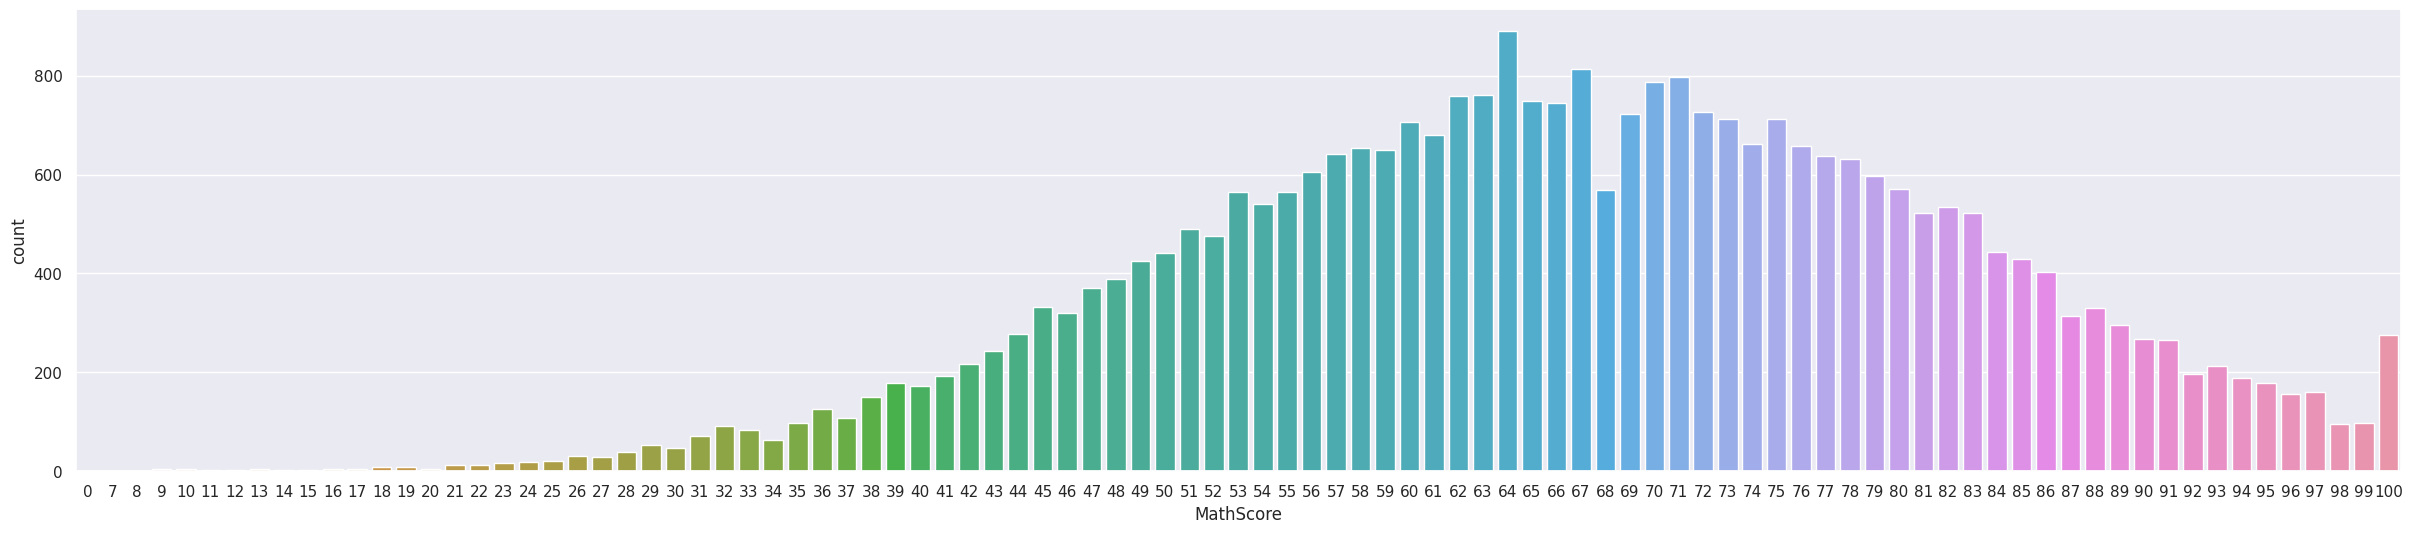

In [220]:
sns.set(rc={'figure.figsize':(30,6)})
sns.countplot(x="MathScore", data=data)

Вычислим основные характеристики:

In [221]:
data.describe()

,NrSiblings,MathScore
count,29069.000000,30641.000000
mean,2.145894,66.558402
std,1.458242,15.361616
min,0.000000,0.000000
25%,1.000000,56.000000
50%,2.000000,67.000000
75%,3.000000,78.000000
max,7.000000,100.000000


`Среднее значение`: 66.5 баллов<br>
`Стандартное отклонение`: 15,36 баллов<br>
`25%-квартиль`: 56 баллов (Ниже этого результата написало 25% от всех учащихся)<br>
`50%-квартиль`: 67 баллов<br>
`75%-квартиль`: 78 баллов<br>


Чтобы отследить зависимость между социально-экономическими факторами и результатами экзамена, составим график зависимости результата от каждого фактора по отдельности в виде ящика с усами и скрипичной диаграммы и сделаем некоторые предварительные выводы по ним:

### В среднем парни сдают экзамен лучше, чем девушки:

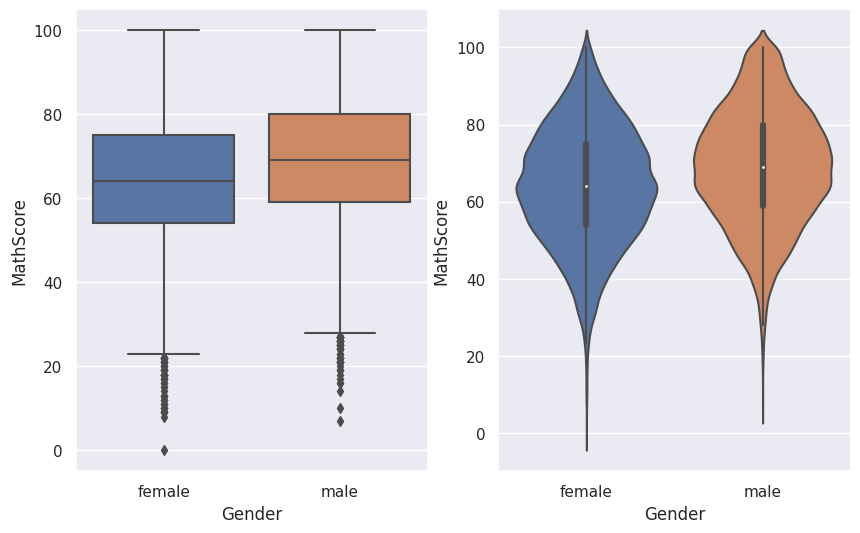

In [222]:
colname = 'Gender'
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(x=colname, y="MathScore", data=data, ax=axes[0])
sns.violinplot(x=colname, y="MathScore", data=data, ax=axes[1])
plt.show()

### Учащиеся из этнической группы Е в основном сдают экзамен лучше, чем учащиеся из остальных групп:

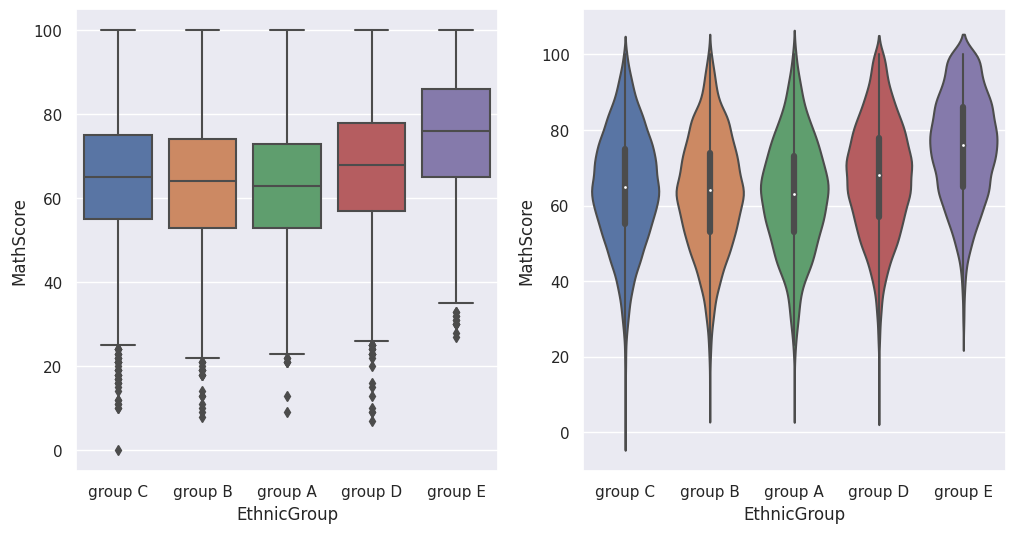

In [223]:
colname = 'EthnicGroup'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x=colname, y="MathScore", data=data, ax=axes[0])
sns.violinplot(x=colname, y="MathScore", data=data, ax=axes[1])
plt.show()

### Образование родителей немного влияет на результаты экзамена - медиана результатов экзамена у детей магистров на 4-5 баллов выше, чем у детей родителей, окончивших только старшие классы:

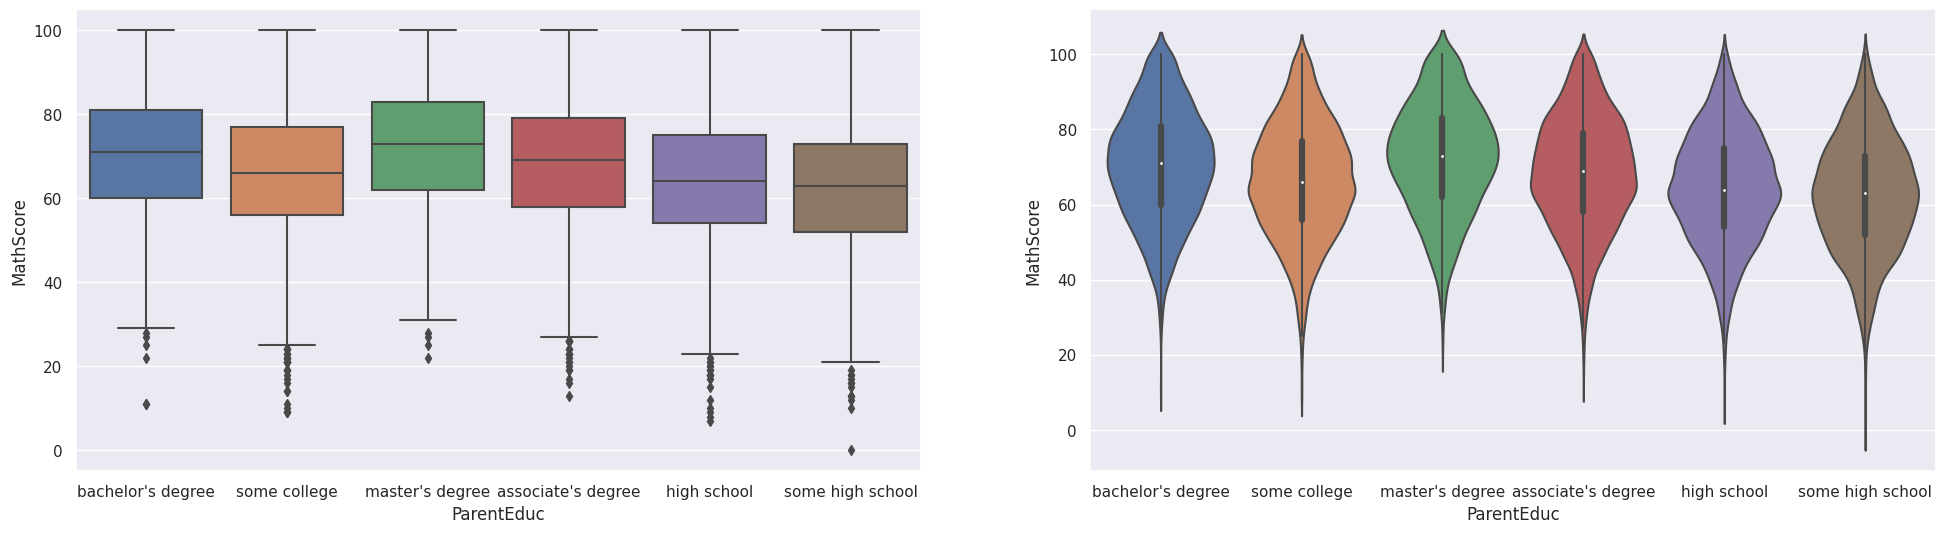

In [224]:
colname = 'ParentEduc'
fig, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.boxplot(x=colname, y="MathScore", data=data, ax=axes[0])
sns.violinplot(x=colname, y="MathScore", data=data, ax=axes[1])
plt.show()

### Наблюдается достаточно сильная зависимость результата экзамена от вида питания в школе - льготники с большей вероятностью напишут экзамены хуже, чем те, кто питается за свои деньги:

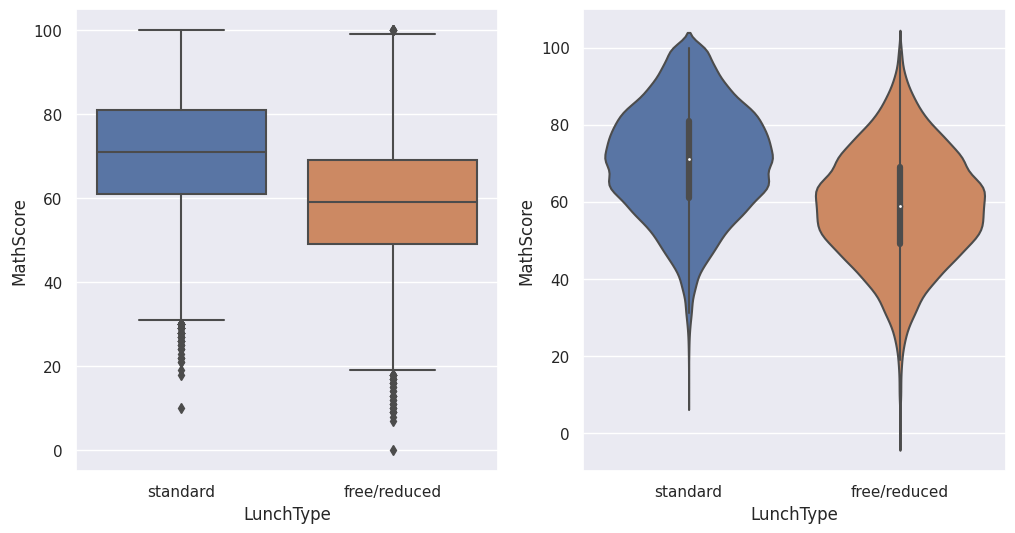

In [225]:
colname = 'LunchType'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x=colname, y="MathScore", data=data, ax=axes[0])
sns.violinplot(x=colname, y="MathScore", data=data, ax=axes[1])
plt.show()

### Имеется корреляция между результатом экзамена и пройденного курса предварительной подготовки - те, кто прошел курс, с немного большей вероятностью напишут экзамен лучше. (Разница медиан составляет около 4-5 баллов):

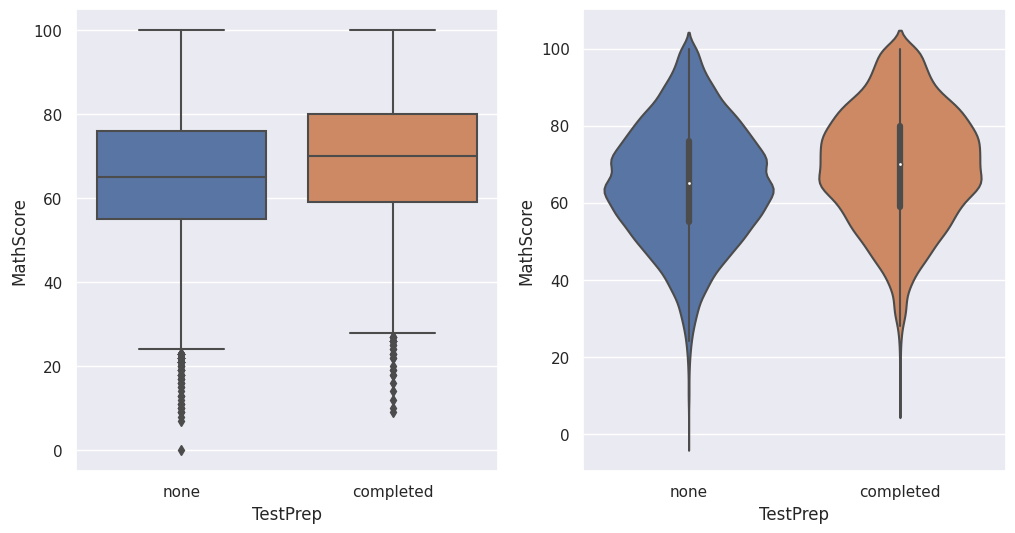

In [226]:
colname = 'TestPrep'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x=colname, y="MathScore", data=data, ax=axes[0])
sns.violinplot(x=colname, y="MathScore", data=data, ax=axes[1])
plt.show()

### Можно заметить совсем небольшую корреляцию между занятиями спортом и результатом экзамена (Разница медиан в 3-4 балла у тех, кто регулярно занимается спортом и тех, кто никогда им не занимается):

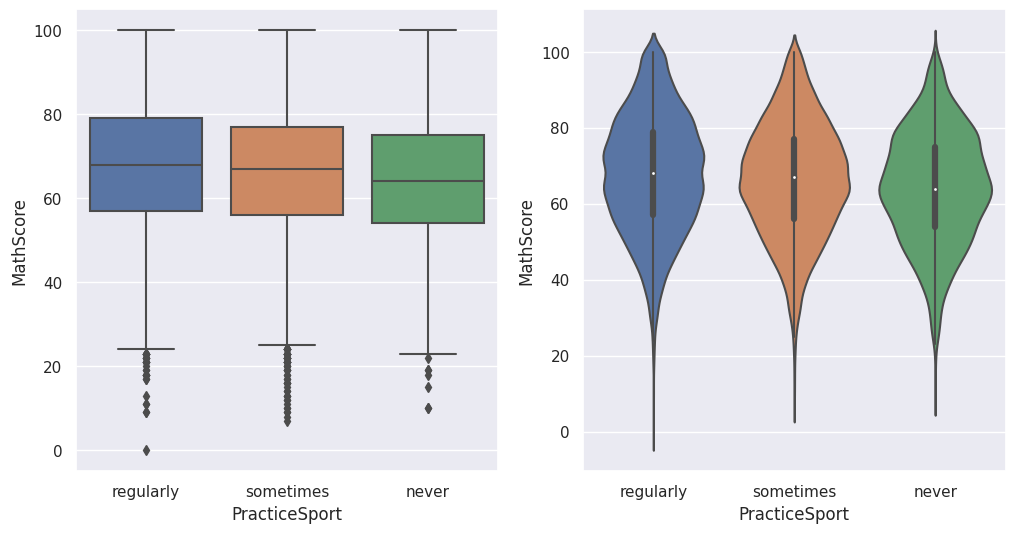

In [227]:
colname = 'PracticeSport'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x=colname, y="MathScore", data=data, ax=axes[0])
sns.violinplot(x=colname, y="MathScore", data=data, ax=axes[1])
plt.show()

### Заметно небольшое улучшение результатов экзамена при более длительных самостоятельных занятиях:

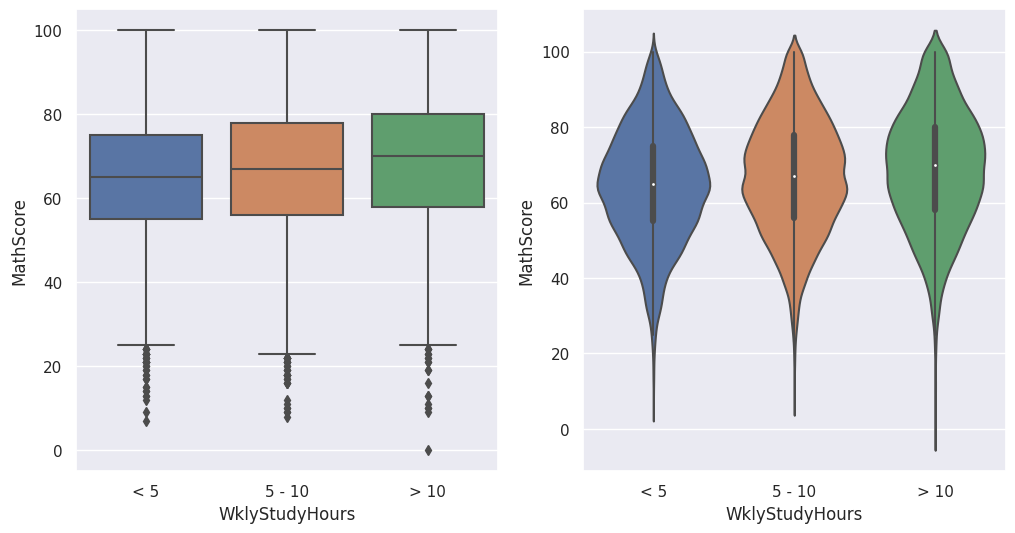

In [228]:
colname = 'WklyStudyHours'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x=colname, y="MathScore", data=data, ax=axes[0])
sns.violinplot(x=colname, y="MathScore", data=data, ax=axes[1])
plt.show()

### Зависимость результата экзамена от остальных факторов выражена слабо:

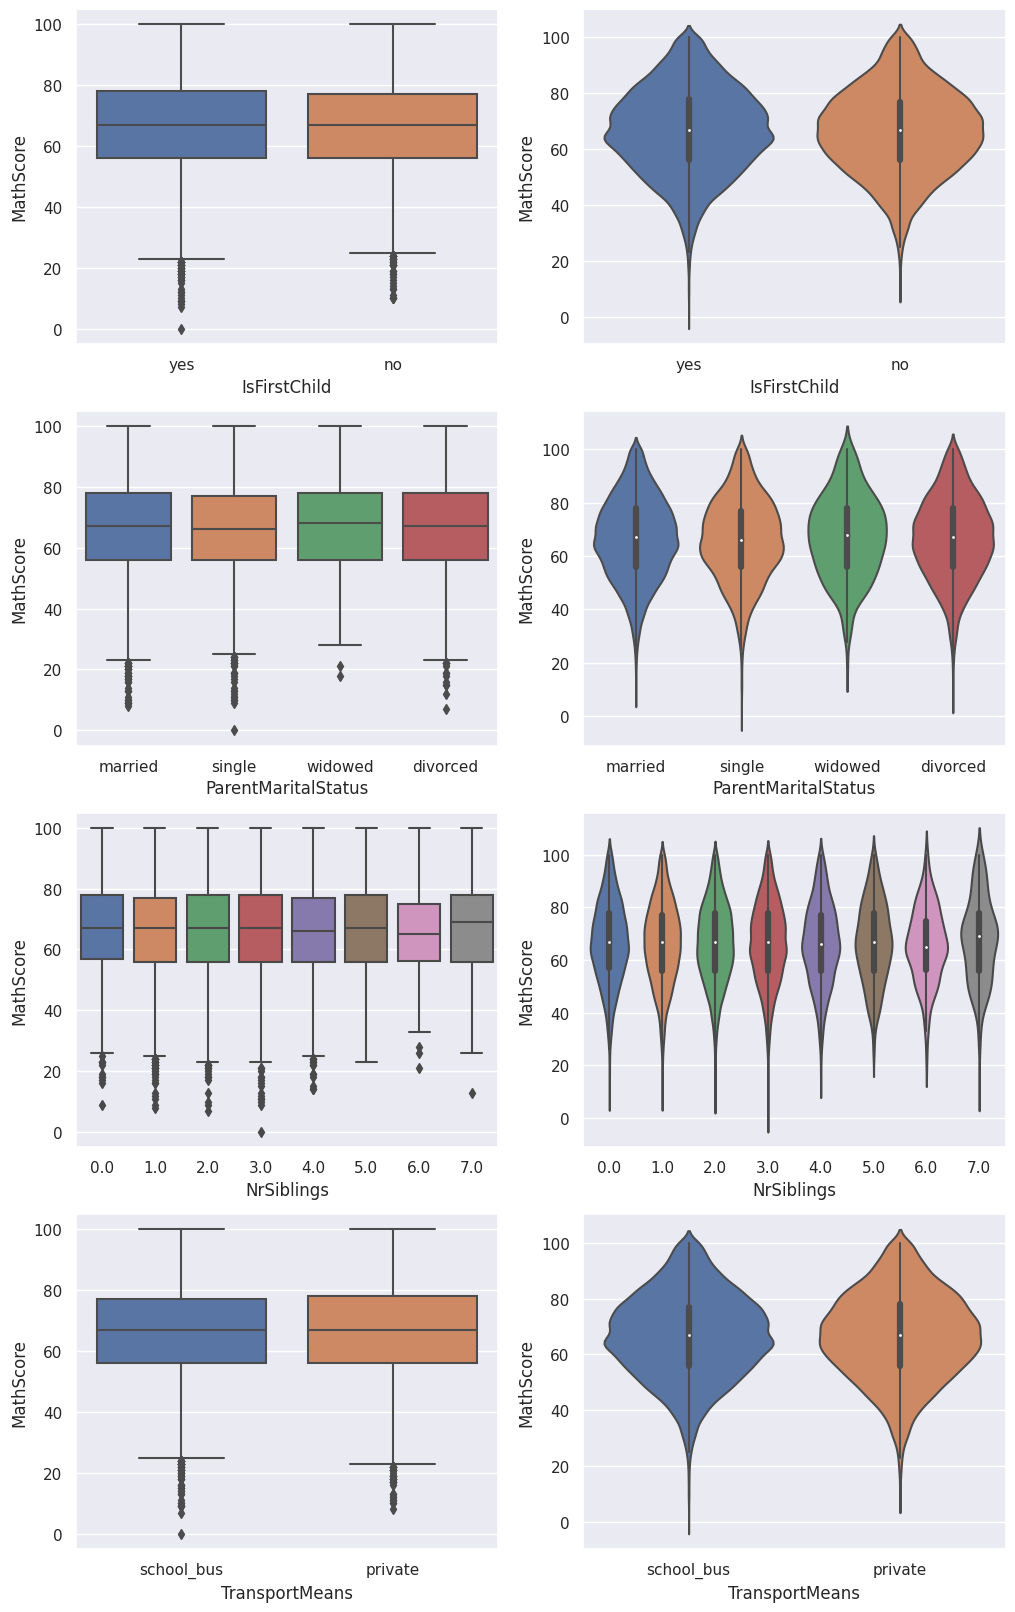

In [229]:
colnames = ['IsFirstChild', 'ParentMaritalStatus', 'NrSiblings', 'TransportMeans']
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

for i in range(len(colnames)):
  sns.boxplot(x=colnames[i], y="MathScore", data=data, ax=axes[i][0])
  sns.violinplot(x=colnames[i], y="MathScore", data=data, ax=axes[i][1])

plt.show()

## Матрица корреляции

Так как почти все признаки категориальные, а матрицу корреляции можно составить только при работе с числовыми значениями, то можно все категориальные признаки временно заменить на числовые и для них составить матрицу корреляции.

<Axes: >

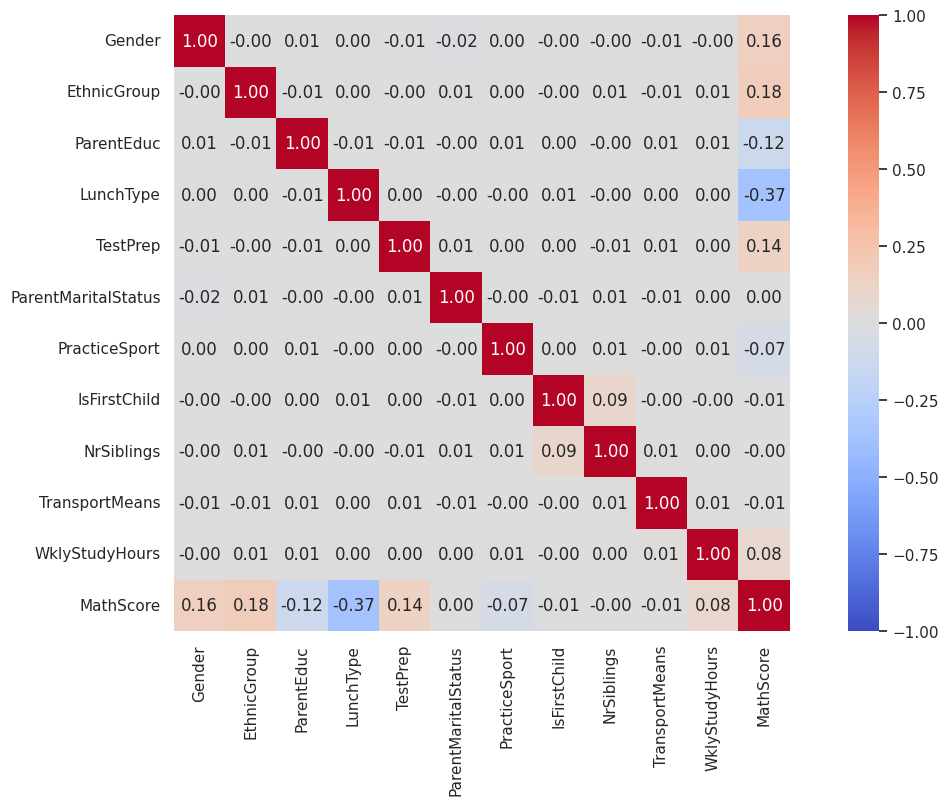

In [230]:
temp_data = data.copy()

# Замена категориальных признаков на числовые
for colname in data.columns:
  if (colname == "NrSiblings" or colname == "MathScore"):
    continue
  unique = data[colname].unique()
  for i in range(0, len(unique)):
    temp_data[colname] = temp_data[colname].replace(unique[i], i)
  temp_data[colname] = temp_data[colname].astype(np.int64)

# Вывод матрицы корреляции
corr_mat = temp_data.corr(numeric_only=True)
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Так как значения категориальных признаков были не упорядочены, то не следует говорить о знаке корреляции, а нужно смотреть лишь на модуль значения корреляции.<br>
Как видим, подтвердились предыдущие предположения о том, что оценка за экзамен наиболее сильно зависит от пола учащегося, его этнической группы, вида обеда, образования родителей, прохождения курса подготовки к экзамену и количества времени, посвященной самостоятельной работе.

# 3. Обработка пропущенных значений

Узнаем количество пропущенных значений по каждому признаку:

In [231]:
data.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
dtype: int64

Так как имеется большое количество пропущенных значений, то просто удалить строки с ними будет крайне неэффективно. Вместо этого, заполним все пропущенные значения модой для каждого признака:

In [232]:
modes = data.mode()
modes

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore
0,female,group C,some college,standard,none,married,sometimes,yes,1.0,school_bus,5 - 10,64


In [233]:
for colname in data.columns:
  data[colname] = data[colname].fillna(modes[colname][0])

# Конвертация свойства MathScore из int64 в float64
data['MathScore'] = data['MathScore'].astype(np.float64)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          30641 non-null  object 
 2   ParentEduc           30641 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             30641 non-null  object 
 5   ParentMaritalStatus  30641 non-null  object 
 6   PracticeSport        30641 non-null  object 
 7   IsFirstChild         30641 non-null  object 
 8   NrSiblings           30641 non-null  float64
 9   TransportMeans       30641 non-null  object 
 10  WklyStudyHours       30641 non-null  object 
 11  MathScore            30641 non-null  float64
dtypes: float64(2), object(10)
memory usage: 2.8+ MB


# 4. Обработка категориальных признаков

In [235]:
categr_cols = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
               'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

for category in categr_cols:
  data[category] = data[category].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               30641 non-null  category
 1   EthnicGroup          30641 non-null  category
 2   ParentEduc           30641 non-null  category
 3   LunchType            30641 non-null  category
 4   TestPrep             30641 non-null  category
 5   ParentMaritalStatus  30641 non-null  category
 6   PracticeSport        30641 non-null  category
 7   IsFirstChild         30641 non-null  category
 8   NrSiblings           30641 non-null  float64 
 9   TransportMeans       30641 non-null  category
 10  WklyStudyHours       30641 non-null  category
 11  MathScore            30641 non-null  float64 
dtypes: category(10), float64(2)
memory usage: 779.6 KB


# 5. Нормализация и бинаризация

### Нормализация числовых признаков - `MathScore` и `NrSiblings` - приведение их к отрезку [0; 1]

In [210]:
nandled_data = data.copy()

nandled_data[['MathScore']] = data[['MathScore']] / 100.0
nandled_data[['NrSiblings']] = data[['NrSiblings']] / data[['NrSiblings']].max()

nandled_data[['NrSiblings', 'MathScore']].head(5)

,NrSiblings,MathScore
0,0.428571,0.71
1,0.000000,0.69
2,0.571429,0.87
3,0.142857,0.45
4,0.000000,0.76


### Бинаризация категориальных признаков:

In [236]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse_output=False)
enc.fit(data[categr_cols])

dummies = pd.DataFrame(enc.transform(data[categr_cols]),
                       columns=enc.get_feature_names_out(), index=data.index)
dummies.head()

,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentEduc_bachelor's degree,ParentEduc_high school,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,...,TestPrep_none,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_yes,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


Добавим новые столбцы к таблице и удалим старые:

In [240]:
handled_data = pd.concat((nandled_data, dummies), axis=1).drop(categr_cols, axis=1)
handled_data.columns

Index(['NrSiblings', 'MathScore', 'Gender_male', 'EthnicGroup_group B',
       'EthnicGroup_group C', 'EthnicGroup_group D', 'EthnicGroup_group E',
       'ParentEduc_bachelor's degree', 'ParentEduc_high school',
       'ParentEduc_master's degree', 'ParentEduc_some college',
       'ParentEduc_some high school', 'LunchType_standard', 'TestPrep_none',
       'ParentMaritalStatus_married', 'ParentMaritalStatus_single',
       'ParentMaritalStatus_widowed', 'PracticeSport_regularly',
       'PracticeSport_sometimes', 'IsFirstChild_yes',
       'TransportMeans_school_bus', 'WklyStudyHours_< 5',
       'WklyStudyHours_> 10'],
      dtype='object')

# 6. Разбиение данных на обучающую и тестовую выборки

In [241]:
X = handled_data.drop(['MathScore'], axis=1)
y = handled_data['MathScore']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(22980, 7661)

# 7. Запуск регрессора, оценка ошибки, подбор гиперпараметров

## Метод K-ближайших соседей

Для задач регрессии, у которой все признаки отмасштабированы (процедура проведена выше) можно применить `метод К-ближайших соседей`<br>


*   Будем запускать один и тот же регрессор с разными гиперпараметрами.
*   Полученные оценки результатов будем заносить в таблицу.
*   Из полученных данных выберем оптимальный гиперпараметр





In [ ]:
# Создание таблицы оценок
rating_table = pd.DataFrame(columns=('Train_RMSE', 'Test_RMSE', 'Difference'))
rating_table

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


n_arr = np.array([1, 3, 5, 7, 10, 15, 20, 30, 40, 50])

for i in range(0, len(n_arr)):
  # Обучение
  model = KNeighborsRegressor(n_neighbors=n_arr[i])
  model.fit(X_train, y_train)

  # Получение результатов
  y_train_predict = model.predict(X_train)
  y_test_predict  = model.predict(X_test)

  # Оценка результатов
  MSE_train = mean_squared_error(y_train*100, y_train_predict*100)
  MSE_test  = mean_squared_error(y_test*100,  y_test_predict*100)

  RMSE_train = MSE_train**0.5
  RMSE_test  = MSE_test**0.5
  RMSE_diff = RMSE_test - RMSE_train

  # Добавление данных в таблицу
  rating_table.loc[str(n_arr[i]) + '-Neighbors', :] = (RMSE_train, RMSE_test, RMSE_diff)

In [295]:
# Вывод таблицы
rating_table

,Train_RMSE,Test_RMSE,Difference
1-Neighbors,9.033778,18.415841,9.382063
3-Neighbors,10.84512,14.986064,4.140944
5-Neighbors,11.70842,14.249145,2.540725
7-Neighbors,12.108438,13.919064,1.810626
10-Neighbors,12.413183,13.713106,1.299923
15-Neighbors,12.668997,13.539743,0.870746
20-Neighbors,12.804324,13.424538,0.620214
30-Neighbors,12.959653,13.319964,0.36031
40-Neighbors,13.036625,13.308321,0.271696
50-Neighbors,13.090802,13.318839,0.228037


Наименьшую ошибку на тесте дает метод `40-ближайших соседей`.

## Метод Random Forest

Воспользуемся другим методом и посмотрим что получится:

In [296]:
from sklearn.ensemble import RandomForestRegressor


n_arr = np.array([5, 10, 30, 50, 70, 100, 150, 200, 300, 400, 500])

for i in range(0, len(n_arr)):
  # Обучение
  model = RandomForestRegressor(n_estimators=n_arr[i])
  model.fit(X_train, y_train)

  # Получение результатов
  y_train_predict = model.predict(X_train)
  y_test_predict  = model.predict(X_test)

  # Оценка результатов
  MSE_train = mean_squared_error(y_train*100, y_train_predict*100)
  MSE_test  = mean_squared_error(y_test*100,  y_test_predict*100)

  RMSE_train = MSE_train**0.5
  RMSE_test  = MSE_test**0.5
  RMSE_diff = RMSE_test - RMSE_train

  # Добавление данных в таблицу
  rating_table.loc[str(n_arr[i]) + '-RandomForest', :] = (RMSE_train, RMSE_test, RMSE_diff)

In [297]:
# Вывод таблицы
rating_table

,Train_RMSE,Test_RMSE,Difference
1-Neighbors,9.033778,18.415841,9.382063
3-Neighbors,10.84512,14.986064,4.140944
5-Neighbors,11.70842,14.249145,2.540725
7-Neighbors,12.108438,13.919064,1.810626
10-Neighbors,12.413183,13.713106,1.299923
15-Neighbors,12.668997,13.539743,0.870746
20-Neighbors,12.804324,13.424538,0.620214
30-Neighbors,12.959653,13.319964,0.36031
40-Neighbors,13.036625,13.308321,0.271696
50-Neighbors,13.090802,13.318839,0.228037


Наименьшую ошибку на тесте `среди методов Random Forest` дает метод `150-деревьев`.<br>
Как можно увидеть из таблицы, лучшим методом из рассмотренных является метод `40-ближайших соседей`.

# 8. Общие выводы

Таким образом, мы рассмотрели задачу восстановления регрессии.<br>


*   С помощью методов визуализации смогли понять взаимосвязь между признаками и результатом.
*   Произвели обработку данных перед запуском алгоритмов обучения
*   Произвели само обучение, применив методы k-ближайших соседей и RandomForest, подобрали к ним оптимальные гиперпараметры
*   Оценили ошибки на тестовой и обучающей выборке


